## Name:Aditya Sanjay Sonawane (TE-1,K-1,31101)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import json

import warnings
warnings.filterwarnings('ignore')

# Data processing

In [2]:
#load the dataset
match_df=pd.read_csv("data.csv")
match_df.head()


,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner
0,Jaipur Pink Panthers,U Mumba,28,44,40,40,24,32,23,22,...,4,NaN,NaN,NaN,NaN,5,Choice of court :Right,5.0,U Mumba,U Mumba
1,Dabang Delhi K.C.,Bengal Warriors,39,40,44,45,27,32,19,21,...,9,NaN,NaN,NaN,NaN,2,Choice of court :Left,4.0,Bengal Warriors,Bengal Warriors
2,Dabang Delhi,Patna Pirates,45,26,45,44,25,28,12,22,...,14,NaN,NaN,NaN,NaN,6,Choice of court :Left,NaN,NaN,Dabang Delhi
3,Dabang Delhi,Jaipur Pink Panthers,21,51,39,40,33,21,27,9,...,6,NaN,NaN,NaN,NaN,3,Choice of court :Left,NaN,NaN,Jaipur Pink Panthers
4,Jaipur Pink Panthers,Puneri Paltan,31,18,44,44,21,21,9,15,...,12,NaN,NaN,NaN,NaN,7,Choice of court :Left,NaN,NaN,Jaipur Pink Panthers


# Data encoding

In [3]:
team_encoding={
    "Jaipur Pink Panthers":3,
    "U Mumba":5,
    "Dabang Delhi K.C.":2,
    "Bengal Warriors":4,
    "Dabang Delhi":2,
    "Patna Pirates":6,
    "Puneri Paltan":7,
    "Telugu Titans":8,
    "Bengaluru Bulls":1,
    "Haryana Steelers":28,
    "Gujarat Fortunegiants":31,
    "U.P. Yoddha":30,
    "India":12,
    "Tamil Thalaivas":29,
    "Iran":18,
    "Republic of Korea":13,
    "Thailand":19,
    "Diler Delhi":238,
    "Bangladesh":14,
    "Storm Queens":10,
    "Kenya":22,
    "Chennai Challengers":239,
    "Pakistan":167,
    "Japan":20,
    "Ice Divas":11,
    "England":16,
    "Poland":23,
    "India Women":173,
    "Haryana":25,
    "Iran Women":176,
    "Services SSCB":26,
    "Fire birds":9,
    "Pondicherry Predators":237,
    "Services SCB":26,
    "Australia":15,
    "Fire Birds":9,
    "Pune Pride":236,
    "Bangalore Rhinos":240,
    "Match Tied":54,
    "Match Drawn":6,
    "USA":21,
    "Haryana Heros":243,
    "Indian Railways":24,
    "Argentina":17,
    "Mumbai Che Raje":242,
    "Telugu Bulls":241,
    "Sri Lanka":172,
    "Indonesia Women":174,
    "Maharashtra":27,
    "Chinese Taipei Women":181,
    "No_Home_Team":34


}
team_encode_dict={
    "team1":team_encoding,
    "team2":team_encoding,
    "winner":team_encoding
}


In [4]:
#replacing strings with numbers, using above encoding
match_df.replace(team_encode_dict, inplace=True)
match_df.head(3)

,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner
0,3,5,28,44,40,40,24,32,23,22,...,4,NaN,NaN,NaN,NaN,5,Choice of court :Right,5.0,U Mumba,5
1,2,4,39,40,44,45,27,32,19,21,...,9,NaN,NaN,NaN,NaN,2,Choice of court :Left,4.0,Bengal Warriors,4
2,2,6,45,26,45,44,25,28,12,22,...,14,NaN,NaN,NaN,NaN,6,Choice of court :Left,NaN,NaN,2


In [5]:
#toss data encoding
toss_encoding={
    "Choice of court :Right":40,
    "Choice of court :Left":41
}
toss_encode_dict={
    "toss_selection":toss_encoding
}

In [6]:
match_df.replace(toss_encode_dict, inplace=True)
match_df.head(3)

,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner
0,3,5,28,44,40,40,24,32,23,22,...,4,NaN,NaN,NaN,NaN,5,40,5.0,U Mumba,5
1,2,4,39,40,44,45,27,32,19,21,...,9,NaN,NaN,NaN,NaN,2,41,4.0,Bengal Warriors,4
2,2,6,45,26,45,44,25,28,12,22,...,14,NaN,NaN,NaN,NaN,6,41,NaN,NaN,2


# Handling NULL values

In [7]:
match_df[match_df["winner"].isnull()==True]

,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner


In [8]:
#handling null values from dataframe
match_df["home_team_id"].fillna(34, inplace=True)
match_df["team2_super_tackles"].fillna(0, inplace=True)
match_df["team1_super_tackles"].fillna(0, inplace=True)
match_df["team2_super_raids"].fillna(0, inplace=True)
match_df["team1_super_raids"].fillna(0, inplace=True)
match_df[match_df["team1_tackles_unsuccessful"].isnull()==True]

,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner


<AxesSubplot:>

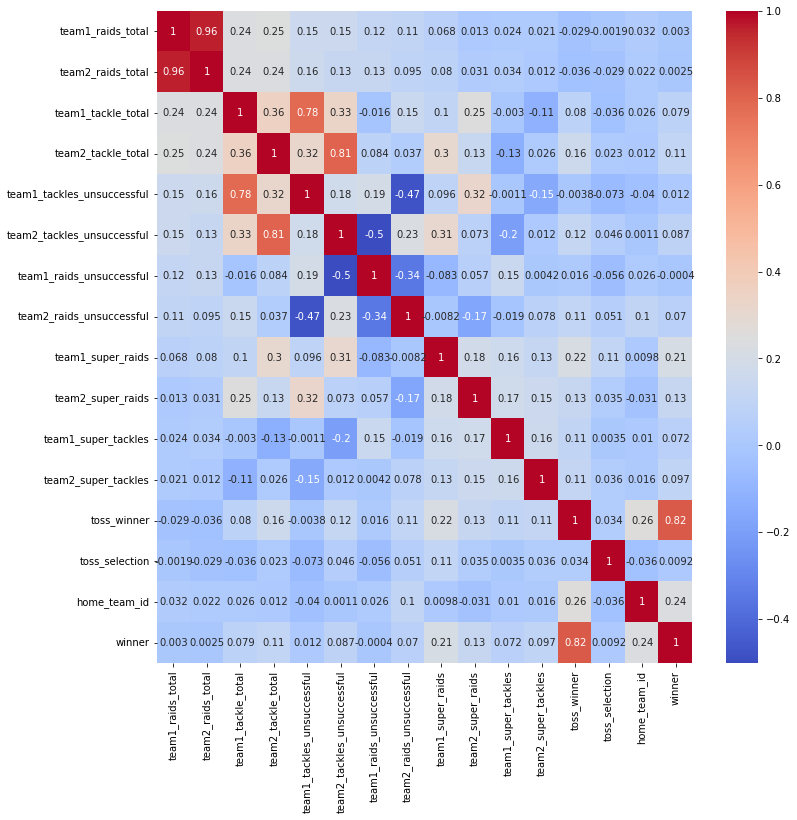

In [11]:
plt.figure(figsize=(12,12))
seaborn.heatmap(x_df.corr(), annot=True, cmap="coolwarm")

Text(0, 0.5, 'winner')

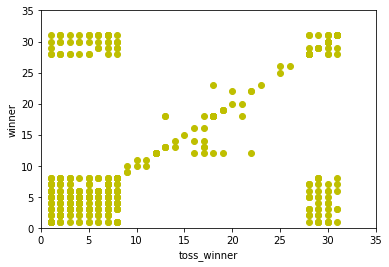

In [9]:
plt.scatter(match_df.toss_winner, match_df.winner, color='y')
plt.xlim(0, 35)
plt.ylim(0,35)
plt.xlabel("toss_winner")
plt.ylabel("winner")

In [13]:
#counting total wins for differant toss_selections
match_df["toss_selection"].value_counts()

41    373
40    306
Name: toss_selection, dtype: int64

# Data Desription

In [14]:
match_df.describe()

,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,team1_raids_unsuccessful,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,winner
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,13.808542,15.543446,32.480118,31.519882,42.683358,42.637703,22.967599,23.287187,14.027982,14.499264,9.578792,9.743741,0.285714,0.290133,0.516937,0.505155,14.528719,40.549337,25.731959,17.379971
std,31.051891,32.404169,9.233570,8.611021,3.015917,3.066826,4.708507,4.945574,5.108046,5.568791,3.466556,3.301785,0.615162,0.577151,0.990780,0.957606,31.232150,0.497927,15.365422,31.520747
min,1.000000,1.000000,8.000000,11.000000,31.000000,31.000000,9.000000,11.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,1.000000
25%,3.000000,4.000000,27.000000,26.000000,41.000000,41.000000,20.000000,20.000000,10.000000,11.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,3.000000,40.000000,8.000000,4.000000
50%,6.000000,7.000000,32.000000,31.000000,43.000000,43.000000,23.000000,23.000000,13.000000,14.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,6.000000,41.000000,34.000000,6.000000
75%,12.000000,19.500000,36.500000,36.000000,44.000000,44.000000,26.000000,26.000000,17.000000,18.000000,12.000000,12.000000,0.000000,0.000000,1.000000,1.000000,17.000000,41.000000,34.000000,28.000000
max,243.000000,242.000000,74.000000,80.000000,54.000000,53.000000,40.000000,42.000000,34.000000,39.000000,22.000000,25.000000,3.000000,3.000000,7.000000,6.000000,243.000000,41.000000,236.000000,240.000000


# Machine Learning

In [15]:
#Splitting the dataset for training and testing.

from sklearn.model_selection import train_test_split


train_df, test_df=train_test_split(match_df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)
test_df


(543, 21)
(136, 21)


,team1,team2,team1_score,team2_score,team1_raids_total,team2_raids_total,team1_tackle_total,team2_tackle_total,team1_tackles_unsuccessful,team2_tackles_unsuccessful,...,team2_raids_unsuccessful,team1_super_raids,team2_super_raids,team1_super_tackles,team2_super_tackles,toss_winner,toss_selection,home_team_id,home_team_name,winner
250,6,7,37,33,52,52,23,28,13,17,...,11,0.0,0.0,0.0,0.0,6,40,34.0,NaN,6
104,2,4,31,37,44,45,23,23,19,18,...,4,0.0,0.0,0.0,0.0,2,40,34.0,NaN,4
379,6,5,41,51,46,46,36,31,30,22,...,6,1.0,0.0,0.0,1.0,6,41,34.0,NaN,5
132,31,4,26,28,40,40,21,17,15,10,...,6,0.0,0.0,5.0,0.0,4,40,31.0,Gujarat Fortunegiants,4
673,8,6,54,32,46,46,29,32,15,27,...,16,0.0,0.0,0.0,0.0,8,40,34.0,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,7,3,29,25,47,47,21,18,9,5,...,14,0.0,0.0,6.0,1.0,7,40,7.0,Puneri Paltan,7
502,7,28,34,22,42,42,17,22,8,13,...,11,0.0,0.0,0.0,1.0,7,41,34.0,NaN,7
261,11,9,13,22,32,32,13,16,7,6,...,6,0.0,0.0,0.0,0.0,9,40,34.0,NaN,9
570,6,2,38,35,41,41,28,30,19,21,...,10,2.0,0.0,0.0,0.0,6,41,34.0,NaN,6


In [16]:
#general function for training the model using perticular algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
import xgboost as xgb

def print_model_scores(model,data,predictor,target):
  model.fit(data[predictor], data[target])
  predictions=model.predict(data[predictor])
  accuracy=accuracy_score(predictions,data[target])
  print("Accuracy:%s"%"{0:.2}".format(accuracy))
  scores=cross_val_score(model,data[predictor],data[target],scoring="neg_mean_squared_error",cv=5)

  print("Cross-Validation Scores:{}".format(np.sqrt(-scores)))
  print(f'Average RMSE: {np.sqrt(-scores).mean()}')


## Logistic Regression

In [17]:
#logistic regression
target_var=["winner"]
predictor_var=["team1","team2","team1_raids_total","team2_raids_total","team1_tackle_total","team2_tackle_total","team1_super_raids","team2_super_raids","toss_winner","toss_selection","home_team_id","team1_raids_unsuccessful","team2_raids_unsuccessful"]
model=LogisticRegression()

print_model_scores(model,train_df,predictor_var,target_var)


Accuracy:0.29
Cross-Validation Scores:[26.90571373 28.09257305 24.05784314 17.14588818 21.20534524]
Average RMSE: 23.481472666930976


In [18]:
#accuarcy on trained data
predictions=model.predict(test_df[predictor_var])
accuracy=accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.17647058823529413


## Random Forest

In [19]:
#random forest classifier
model=RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df, predictor_var,target_var)

Accuracy:1.0
Cross-Validation Scores:[17.76167403 19.83602505 25.05718231 15.39811196 21.33637131]
Average RMSE: 19.87787293169198


In [20]:
predictions=model.predict(test_df[predictor_var])
accuracy=accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.5220588235294118


## SVM

In [21]:
#svm
model=svm.SVC()
print_model_scores(model,train_df, predictor_var,target_var)

Accuracy:0.2
Cross-Validation Scores:[23.11697418 27.64735334 25.20539479 17.41354305 24.148844  ]
Average RMSE: 23.50642187351246


In [22]:
predictions=model.predict(test_df[predictor_var])
accuracy=accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.11764705882352941


## Xg-Boost

In [23]:
model=xgb.XGBClassifier(seed = 82,eval_metric='mlogloss')
print_model_scores(model,train_df, predictor_var,target_var)

Accuracy:1.0
Cross-Validation Scores:[23.45833707 33.67042096 22.69684535 14.9706503  24.09548905]
Average RMSE: 23.77834854635193


In [24]:
predictions=model.predict(test_df[predictor_var])
accuracy=accuracy_score(predictions,test_df[target_var])
print(accuracy)

0.6470588235294118


So, from above models, we can conclude that differant models gives differant accuracy after changing the features. In most of the cases Xg-boost and random forest gives us the high accuracy. So we can use Xg-boost to predict the winner of the game as it gives accuracy of 74%

In [36]:
#random forest classifier
model=RandomForestClassifier(n_estimators=100)
print_model_scores(model,train_df, predictor_var,target_var)

Accuracy:1.0
Cross-Validation Scores:[17.09337551 19.73494084 28.79697996 15.91412138 20.26148508]
Average RMSE: 20.360180554437157


In [38]:
#example prediction using random forest
output=model.predict([['2', '6', '45', '44', '25', '28', '0', '0', '6', '41', '34', '7', '14']])
print(output)

[2]


so, from above example between team 2 (i.e."Dabang Delhi K.C.") and team 6 (i.e."Patana Pirates"), the winner is team 2. Which is encoded to "Dabang Delhi K.C." Which is correct output.